In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothic')

file_path = r"./data/jeju_card.csv"
jeju_card_df = pd.read_csv(file_path)

In [2]:
# '연월' 열을 날짜 형식으로 변환합니다.
# 'YYYY-MM' 형식으로 변환하여 날짜 형식으로 만듭니다.
jeju_card_df['연월'] = pd.to_datetime(jeju_card_df['연월'], format='%Y-%m')

# 연도별로 데이터 추출
jeju_card_df['Year'] = jeju_card_df['연월'].dt.year
jeju_card_df = jeju_card_df[jeju_card_df['Year'].isin([2017, 2018])]

1. 연월별 카드 이용 추이 집계

In [3]:
# 연월별 카드 이용 금액 및 이용 횟수 집계
monthly_summary = jeju_card_df.groupby(['연월', 'Year']).agg({
    '이용금액': 'sum',  # 카드 이용 금액
    '이용횟수': 'sum'   # 이용 횟수
}).reset_index()

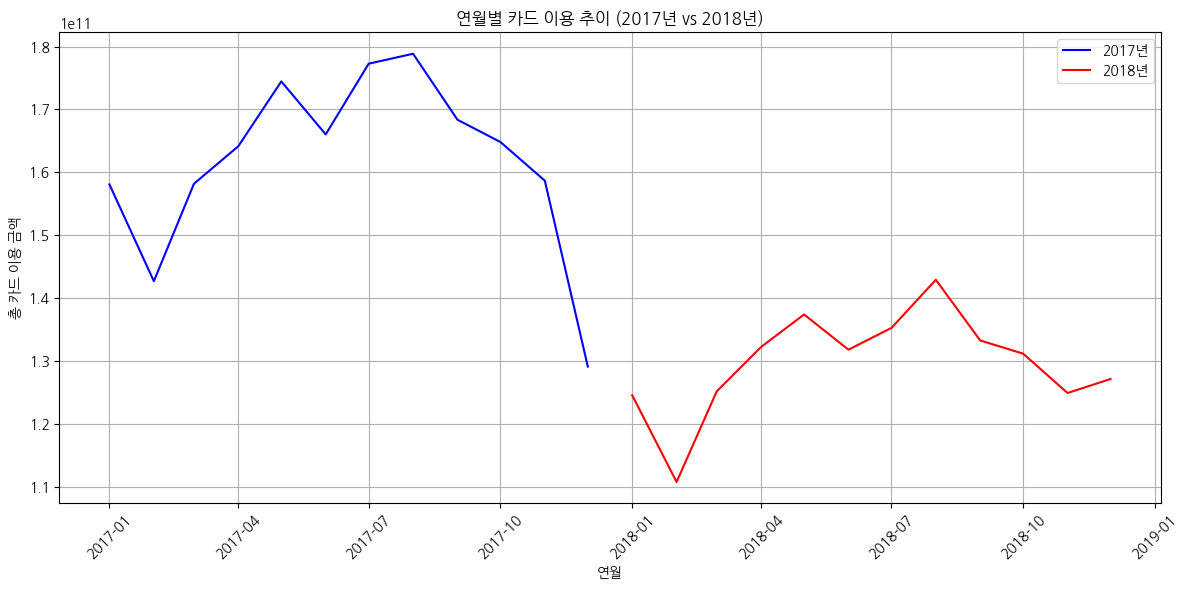

In [4]:
plt.figure(figsize=(12, 6))

# 2017년 데이터 플로팅
plt.plot(
    monthly_summary[monthly_summary['Year'] == 2017]['연월'],
    monthly_summary[monthly_summary['Year'] == 2017]['이용금액'],
    label='2017년', color='blue'
)

# 2018년 데이터 플로팅
plt.plot(
    monthly_summary[monthly_summary['Year'] == 2018]['연월'],
    monthly_summary[monthly_summary['Year'] == 2018]['이용금액'],
    label='2018년', color='red'
)

plt.title('연월별 카드 이용 추이 (2017년 vs 2018년)')
plt.xlabel('연월')
plt.ylabel('총 카드 이용 금액')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()


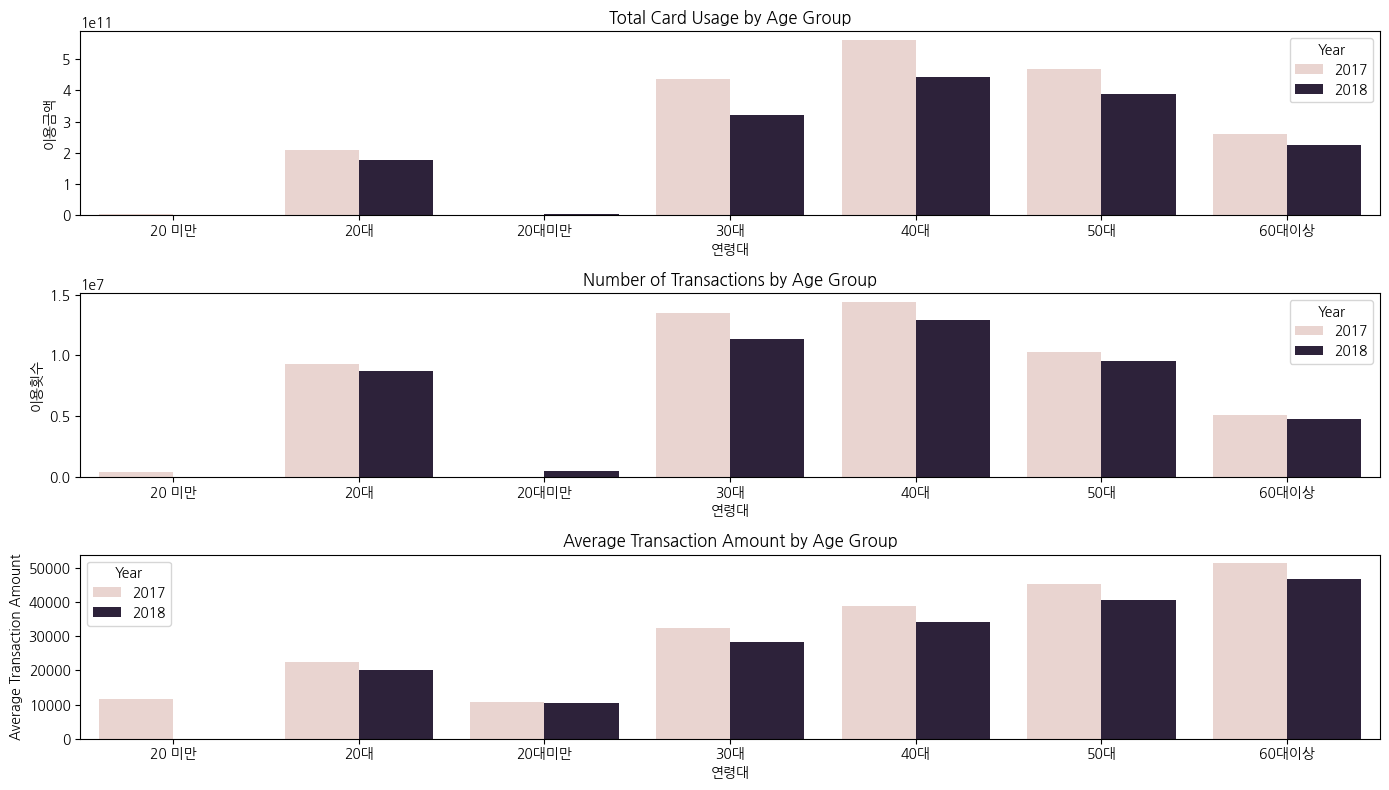

In [5]:
# 연령대별 카드 이용 통계
age_summary = jeju_card_df.groupby(['연령대', 'Year']).agg({
    '이용금액': 'sum',
    '이용횟수': 'sum'
}).reset_index()

# 1회당 소비금액 계산
age_summary['Average Transaction Amount'] = age_summary['이용금액'] / age_summary['이용횟수']

# 시각화
plt.figure(figsize=(14, 8))

# 총 이용금액
plt.subplot(3, 1, 1)
sns.barplot(data=age_summary, x='연령대', y='이용금액', hue='Year')
plt.title('Total Card Usage by Age Group')

# 이용 횟수
plt.subplot(3, 1, 2)
sns.barplot(data=age_summary, x='연령대', y='이용횟수', hue='Year')
plt.title('Number of Transactions by Age Group')

# 1회당 소비금액
plt.subplot(3, 1, 3)
sns.barplot(data=age_summary, x='연령대', y='Average Transaction Amount', hue='Year')
plt.title('Average Transaction Amount by Age Group')

plt.tight_layout()
plt.show()

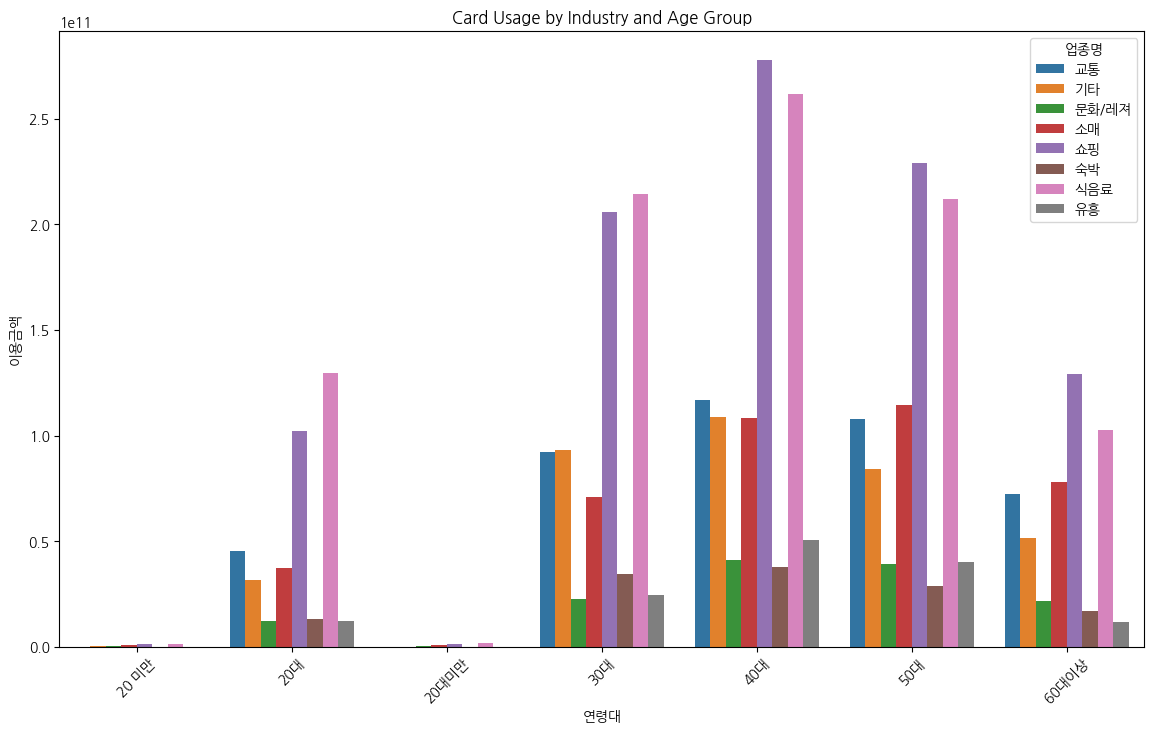

In [6]:
# 연령대별 업종별 지출
industry_summary = jeju_card_df.groupby(['연령대', '업종명']).agg({
    '이용금액': 'sum'
}).reset_index()

# 시각화
plt.figure(figsize=(14, 8))
sns.barplot(data=industry_summary, x='연령대', y='이용금액', hue='업종명')
plt.title('Card Usage by Industry and Age Group')
plt.xticks(rotation=45)
plt.show()

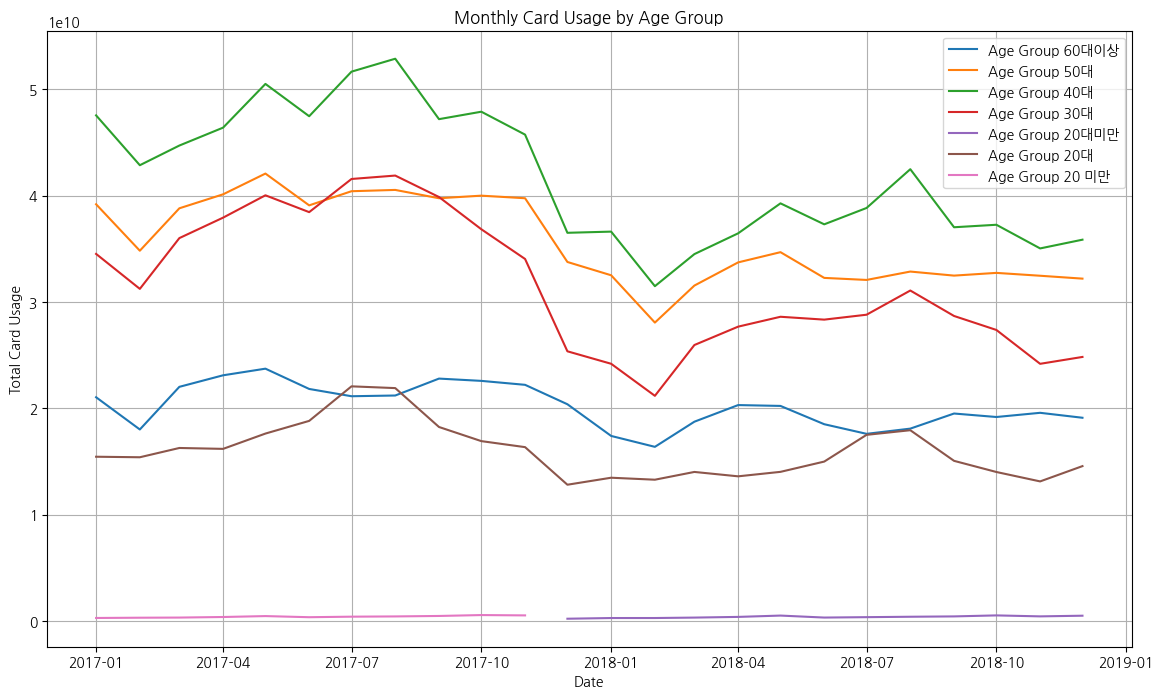

In [7]:
# 연령대별 연월별 카드 이용 추이
age_monthly_summary = jeju_card_df.groupby(['연월', '연령대']).agg({
    '이용금액': 'sum'
}).reset_index()

plt.figure(figsize=(14, 8))
for age_group in jeju_card_df['연령대'].unique():
    group_data = age_monthly_summary[age_monthly_summary['연령대'] == age_group]
    plt.plot(group_data['연월'], group_data['이용금액'], label=f'Age Group {age_group}')

plt.title('Monthly Card Usage by Age Group')
plt.xlabel('Date')
plt.ylabel('Total Card Usage')
plt.legend()
plt.grid(True)
plt.show()